# Sujet 6 : Autour du Paradoxe de Simpson
---
**Prérequis :** calcul de moyennes et de ratios, techniques de présentations graphiques simples, éventuellement régression logistique

---

En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud-ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et cherchaient à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé et ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage.

---

**Votre mission si vous l'acceptez :**

1. Représentez dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. Calculez dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe). Vous pourrez proposer une représentation graphique de ces données et calculer des intervalles de confiance si vous le souhaitez. En quoi ce résultat est-il surprenant ?
2. Reprenez la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge. On considérera par exemple les classes suivantes : 18-34 ans, 34-54 ans, 55-64 ans, plus de 65 ans. En quoi ce résultat est-il surprenant ? Arrivez-vous à expliquer ce paradoxe ? De même, vous pourrez proposer une représentation graphique de ces données pour étayer vos explications.
3. Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, il est envisageable d'essayer de réaliser une régression logistique. Si on introduit une variable Death valant 1 ou 0 pour indiquer si l'individu est décédé durant la période de 20 ans, on peut étudier le modèle Death ~ Age pour étudier la probabilité de décès en fonction de l'âge selon que l'on considère le groupe des fumeuses ou des non fumeuses. Ces régressions vous permettent-elles de conclure sur la nocivité du tabagisme ? Vous pourrez proposer une représentation graphique de ces régressions (en n'omettant pas les régions de confiance).
4. Déposez votre étude dans FUN

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import os
import urllib.request

En suivant la technique apprise dans le precédent exercice, on vérifie si le jeu de données existe déjàs ous la forme d'un fichier local .csv et si non, on le télécharge.

In [2]:
datas_file = 'simpson_paradox.csv'
datas_url = 'https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv'

if not os.path.exists(datas_file):
    urllib.request.urlretrieve(datas_url, datas_file)

In [3]:
raw_datas = pd.read_csv(datas_file, header=0)

On vérifie l'absence de données nulles par ligne

In [4]:
raw_datas[raw_datas.isnull().any(axis=1)]

Empty DataFrame
Columns: [Smoker, Status, Age]
Index: []

---
## Exercice 1
Représentez dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. Calculez dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe). Vous pourrez proposer une représentation graphique de ces données et calculer des intervalles de confiance si vous le souhaitez. En quoi ce résultat est-il surprenant ?

- D'après l'énoncé, il faudrait classer les données selon que les femmes aient été fummeuses, donc on copie la DataFrame `raw_datas` en modifiant son index par la colonne `Smoker`

In [5]:
sorted_datas1 = raw_datas.set_index('Smoker').sort_index()

- On peut ensuite utiliser la fonction `.loc` pour avoir uniquement les fumeuses (`Yes`) ou les non fumeuses (`No`) et créer deux nouveau objets de type DataFrame `smokers` & `non_smokers`
    - le total de lignes étant le nombre total de femmes appartenant à ce groupe et peut être obtenu via la fonction `len`

In [6]:
smokers = sorted_datas1.loc['Yes']
non_smokers = sorted_datas1.loc['No']

In [14]:
smokers_total = len(smokers)
non_smokers_total = len(non_smokers)
print('Total fumeuses = {} / Total non-fumeuses = {}'.format(smokers_total, non_smokers_total))

Total fumeuses = 582 / Total non-fumeuses = 732


- On peut accéder au nombre total de femmes décédées par groupe  via `(non_)smokers.loc[smokers['Status'] == 'Dead']`

In [15]:
smokers_dead = len(smokers.loc[smokers['Status'] == 'Dead'])
non_smokers_dead = len(non_smokers.loc[non_smokers['Status'] == 'Dead'])
print('Fumeuses mortes = {} / Non-fumeuses mortes = {}'.format(smokers_dead, non_smokers_dead))

Fumeuses mortes = 139 / Non-fumeuses mortes = 230


- On calcule le taux de mortalité par groupe

In [16]:
smokers_mortality = smokers_total / smokers_dead
non_smokers_mortality = non_smokers_total / non_smokers_dead
print('Mortalité chez les femmes fumeuses : {:.2f}'.format(smokers_mortality))
print('Mortalité chez les femmes non-fumeuses : {:.2f}'.format(non_smokers_mortality))

Mortalité chez les femmes fumeuses : 4.19
Mortalité chez les femmes non-fumeuses : 3.18


J'ai du me tromper quelque part car je ne trouve pas que le résultat soit surprenant

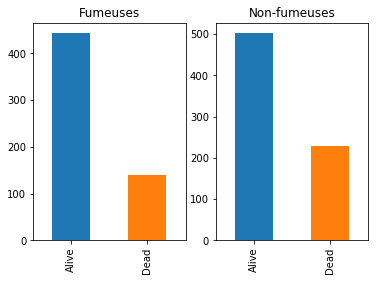

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2)
smokers['Status'].value_counts().plot.bar(title='Fumeuses', ax=axes[0])
non_smokers['Status'].value_counts().plot.bar(title='Non-fumeuses', ax=axes[1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e2b887c50>],
      dtype=object)

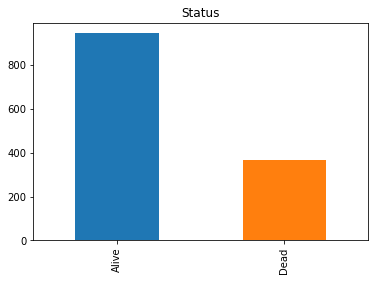

In [43]:
sorted_datas1['Status'].value_counts().plot.bar(subplots=True)

---
## Exercice 2
Reprenez la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge. On considérera par exemple les classes suivantes : 18-34 ans, 34-54 ans, 55-64 ans, plus de 65 ans. En quoi ce résultat est-il surprenant ? Arrivez-vous à expliquer ce paradoxe ? De même, vous pourrez proposer une représentation graphique de ces données pour étayer vos explications.

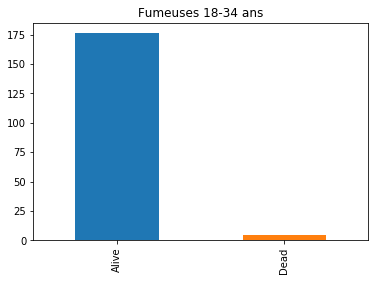

In [44]:
smokers.set_index('Age').sort_index().loc[18 : 34]['Status'].value_counts().plot.bar(title='Fumeuses 18-34 ans')

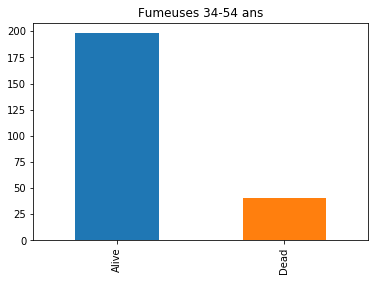

In [45]:
smokers.set_index('Age').sort_index().loc[34 : 54]['Status'].value_counts().plot.bar(title='Fumeuses 34-54 ans')

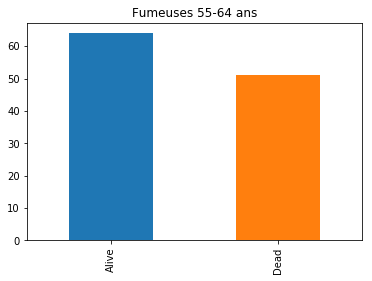

In [46]:
smokers.set_index('Age').sort_index().loc[55 : 64]['Status'].value_counts().plot.bar(title='Fumeuses 55-64 ans')

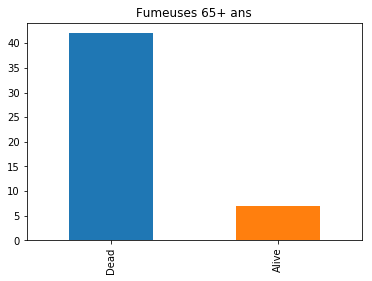

In [47]:
smokers.set_index('Age').sort_index().loc[65:]['Status'].value_counts().plot.bar(title='Fumeuses 65+ ans')